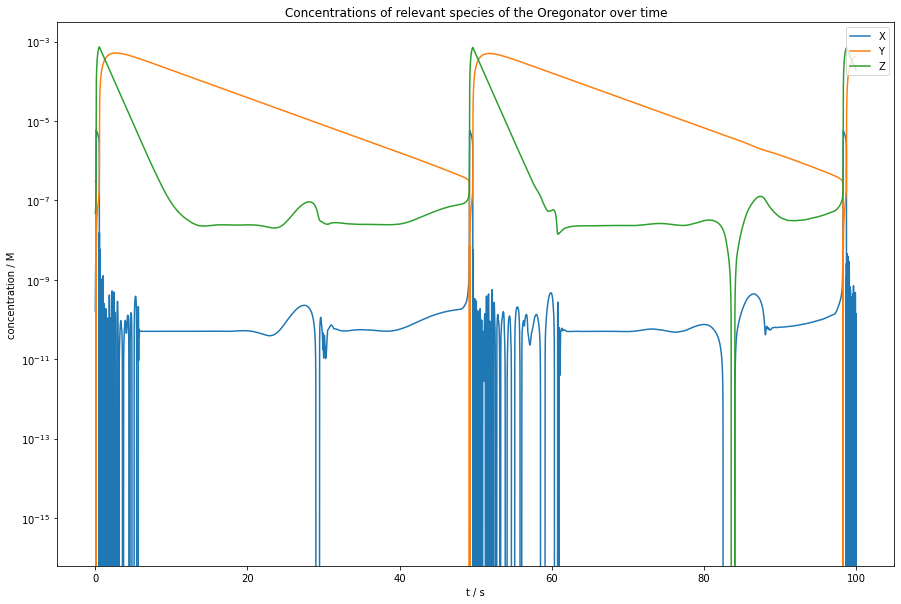

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

class cell:
    def __init(self, concentration):
        self.conc = concentration

k1 = 1.34
k2 = 1.6*(10**9)
k3 = 8*(10**3)
k4 = 4*(10**7)
k5 = 1

y0 = [0.06, 0.06, 0, 0, 10**(-9.8), 10**(-6.52), 10**(-7.32)]

#t = np.linspace(0, 100, num=1000000)
t = np.arange(0.0, 100, 10**-4)

def oregonator(Y,t):
    a = Y[0]
    b = Y[1]
    p = Y[2]
    q = Y[3]
    x = Y[4]
    y = Y[5]
    z = Y[6]
    
    dadt = -k1*a*y
    dbdt = -k3*b*x
    dpdt = k1*a*y + k2*x*y
    dqdt = k4*(x**2)
    dxdt = k1*a*y - k2*x*y - 2*k4*(x**2) + k3*b*x
    dydt = - k1*a*y - k2*x*y + k5*z
    dzdt = k3*b*x - k5*z
    
    return [dadt, dbdt, dpdt, dqdt, dxdt, dydt, dzdt]

results = odeint(oregonator, y0, t)

fig = plt.figure(figsize=(15,10))

plt.plot(t, results[:,4:])

plt.yscale('log')
plt.title('Concentrations of relevant species of the Oregonator over time')
plt.xlabel('t / s')
plt.ylabel('concentration / M')
plt.legend(['X','Y','Z'], loc='upper right')


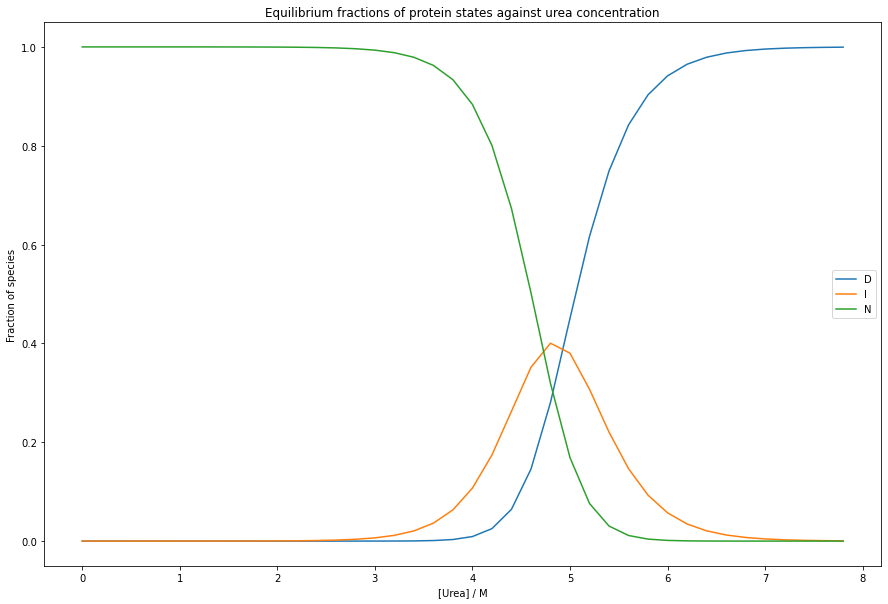

In [2]:
kf_R15f = 26000
kf_R15u = 6*(10**-2)
kf_R16f = 730
kf_R16u = 7.5*(10**-4)

y0 = [0, 0, 1]

urea = np.arange(0.0, 8.0, 0.2)
t = np.arange(0.0, 1000, 1)

def oregonator(Y,t):
    d = Y[0]
    i = Y[1]
    n = Y[2]
    k5f = kf_R15f*exp(-1.68*u)
    k5u = kf_R15u*exp(0.95*u)
    k6f = kf_R16f*exp(-1.72*u)
    k6u = kf_R16u*exp(1.2*u)
    
    dddt = - k5f*d + k5u*i
    didt = k5f*d - k5u*i - k6f*i + k6u*n
    dndt = k6f*i - k6u*n
    
    return [dddt, didt, dndt]
u =0
concs = []
for i in urea:
    u = i
    results = odeint(oregonator, y0, t)
    concs.append(results[-1])

fig = plt.figure(figsize=(15,10))

plt.plot(urea, concs)

plt.title('Equilibrium fractions of protein states against urea concentration')
plt.xlabel('[Urea] / M')
plt.ylabel('Fraction of species')
plt.legend(['D','I','N'])